# Import libraries

In [23]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Import data

In [24]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [25]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Mutual information

In [27]:
mi = mutual_info_regression(X_train, y_train)

Text(0.5, 1.0, 'Mutual information between predictors and target')

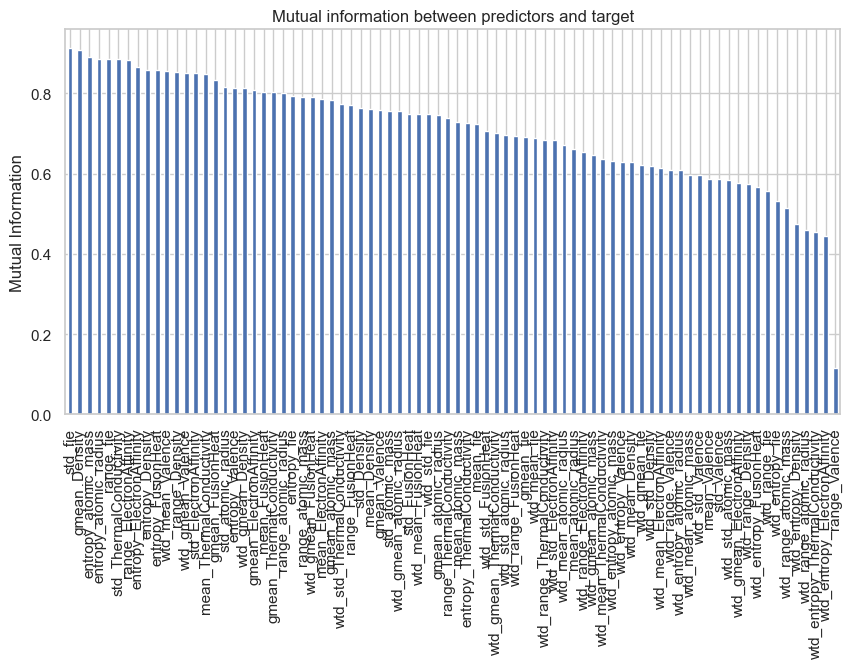

In [28]:
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [29]:
sel = SelectPercentile(mutual_info_regression,
                       percentile=80).fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie',
       'wtd_gmean_fie', 'entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gme

In [30]:
X_train_m = sel.transform(X_train)
X_test_m = sel.transform(X_test)

In [31]:
X_train_m = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test_m = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

X_train_m.head()

,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,...,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,wtd_range_Valence
15511,55.373780,18.464990,12.621306,0.683843,0.094125,105.41206,43.098264,950.333333,1034.773098,918.814666,...,90.81950,37.925750,38.963777,35.470359,2.614130,2.000000,2.112285,0.955700,0.499845,2.125000
2892,72.816957,52.075936,35.756780,0.838545,0.844388,122.90607,50.602625,866.400000,1015.201551,808.929244,...,399.97342,56.402156,185.567013,137.850150,2.282087,2.289428,2.242349,1.078992,0.971125,0.871650
3650,71.885607,60.708840,32.373992,1.811361,1.776320,121.32760,35.914688,699.014286,996.111539,663.564846,...,399.97342,61.524149,137.774946,142.685658,2.123077,2.245649,2.102339,1.927392,1.487321,1.030769
9028,104.365600,72.746865,42.654930,1.129463,1.209343,184.59060,70.392496,891.650000,1014.844325,838.584885,...,399.97342,47.775848,169.524558,127.993444,2.000000,2.000000,2.000000,1.386294,1.189049,0.805257
19291,85.856759,80.031150,72.474689,1.534555,1.404447,96.11900,34.981246,711.860000,791.682800,696.141845,...,86.00000,26.836000,30.676375,22.255101,3.736000,3.245342,3.567305,1.564370,1.193692,1.824000


In [32]:
X_train_m.shape, X_test_m.shape

((16954, 64), (4239, 64))

# Scaling

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_m)

X_test_sc=min_max_scaler.fit_transform(X_test_m)

In [34]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [35]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [36]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0739
Test MAE (LR_baseline) : 0.0893 

Train R^2 (LR_baseline): 0.7229
Test R^2 (LR_baseline) : 0.6437 



# Cross-Validation

In [18]:
list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']),
        np.mean(cv_result['test_neg_mean_absolute_error']) 
    ]

print(cv_results)

                             fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      154.287415    0.047326               -0.002611   
XGBRegressor                21.668774    0.004678               -0.002829   
KNeighborsRegressor          0.013989    0.148529               -0.003553   
LGBMRegressor                1.945638    0.007003               -0.003106   
SVR                          7.748358    0.398882               -0.006721   
DecisionTreeRegressor        1.595488    0.001679               -0.004167   
GradientBoostingRegressor   49.709321    0.003357               -0.004849   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.028164  
XGBRegressor                             -0.031528  
KNeighborsRegressor                      -0.033145  
LGBMRegressor                            -0.035152  
SVR                                      -0.062409  
DecisionTreeRegressor                    -0.033240  
GradientBoos

In [19]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  64.746828    0.092027               -0.002884


# RandomForestRegressor

In [37]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_30120\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.006832675053429602
Mean Absolute Error (MAE): 0.05730765667008047
R-squared (R2): 0.8017425260146895
mape: 9.110961901856411


# XGBRegressor

In [38]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.006073953320621978
Mean Absolute Error (MAE): 0.05237453748974165
R-squared (R2): 0.8237576596231133
mape: 8.318876800651681


# CatBoostRegressor

In [39]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1720791	total: 9.52ms	remaining: 1.89s
50:	learn: 0.0689205	total: 466ms	remaining: 1.36s
100:	learn: 0.0619570	total: 914ms	remaining: 896ms
150:	learn: 0.0567771	total: 1.4s	remaining: 456ms
199:	learn: 0.0534000	total: 1.92s	remaining: 0us
Mean Squared Error (MSE): 0.005753150600701512
Mean Absolute Error (MAE): 0.0513100928596306
R-squared (R2): 0.8330660983241641
mape: 7.220057684493687


# Choosing the model and tuning

In [45]:
RandomForest_LABEL = 'RF'
CATBOOST_LABEL = 'CatBoost'
LGBM_LABEL = 'LGBM'
XGB_LABEL = 'XGB'

def unpack_dict(dict_):
    result = dict()
    for k, v in dict_.items():
        if isinstance(v, dict):
            result = {**result, **unpack_dict(v)}
        else:
            result[k] = v
    return result

def round_floats(object_, ndigits=5):
    if isinstance(object_, float):
        return round(object_, ndigits)
    if isinstance(object_, dict):
        return {k: round_floats(v) for k, v in object_.items()}
    if isinstance(object_, (list, tuple)):
        return [round_floats(x) for x in object_]
    return object_

def pretty_print_dict(dict_, sort_keys=True, indent=4, ndigits=None) -> str:
    if ndigits is not None:
        dict_ = round_floats(dict_, ndigits)
    return json.dumps(dict_, sort_keys=sort_keys, indent=indent)

def base_model(model_type, random_state, n_jobs):
    if model_type == CATBOOST_LABEL:
        return CatBoostRegressor(random_state=random_state)
    elif model_type == LGBM_LABEL:
        return LGBMRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == XGB_LABEL:
        return XGBRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == RandomForest_LABEL:
        return RandomForestRegressor(random_state=random_state, n_jobs=n_jobs)
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def shuffle_split(X, test_size, random_state):
    n_train, n_test = _validate_shuffle_split(X.shape[0], test_size=test_size, train_size=None)
    splitter = ShuffleSplit(test_size=n_test, train_size=n_train, random_state=random_state)
    train_index, test_index = next(splitter.split(X=X))
    return train_index, test_index

def search_space(model_type):
    if model_type == LGBM_LABEL:
        return {
            'boosting_type': hp.choice('LGBM_boosting_type', ['gbdt']),
            'max_depth': ho_scope.int(hp.quniform('LGBM_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('LGBM_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('LGBM_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('LGBM_n_estimators', 50, 1000, 10)),
            'max_bin': ho_scope.int(hp.quniform('LGBM_max_bin', 200, 300, 5)),
            'lambda_l1': hp.loguniform('LGBM_lambda_l1', np.log(1e-8), 10.0),
            'lambda_l2': hp.loguniform('LGBM_lambda_l2', np.log(1e-8), 10.0),
            'min_gain_to_split': hp.uniform('LGBM_min_gain_to_split', 0.0, 15.0),
            'bagging_freq': hp.choice('LGBM_bagging_freq', [1]),
            'bagging_fraction': hp.quniform('LGBM_bagging_fraction', 0.5, 0.95, 0.05),
        }
    elif model_type == CATBOOST_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('CatBoost_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('CatBoost_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('CatBoost_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('CatBoost_n_estimators', 50, 1000, 10)),
            'l2_leaf_reg': hp.loguniform('CatBoost_l2_leaf_reg', np.log(1e-8), 10.0),
        }
    elif model_type == XGB_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('XGB_max_depth', 3, 7, 1)),
            'learning_rate': hp.loguniform('XGB_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('XGB_n_estimators', 50, 1000, 10)),
            'reg_alpha': hp.loguniform('XGB_l2_reg_alpha', np.log(1e-8), 10.0),
            'reg_lambda': hp.loguniform('XGB_l2_reg_lambda', np.log(1e-8), 10.0),
        }
    elif model_type == RandomForest_LABEL:
        return {
            'n_estimators': ho_scope.int(hp.quniform('RF_n_estimators', 50, 1000, 10)),
            'max_depth': ho_scope.int(hp.quniform('RF_max_depth', 3, 20, 1)),
            'min_samples_split': hp.uniform('RF_min_samples_split', 0.1, 1.0),
            'min_samples_leaf': hp.uniform('RF_min_samples_leaf', 0.1, 0.5),
            'max_features': hp.choice('RF_max_features', ['sqrt', 'log2', None]),
        }
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def evaluate_scores(estimator, X, y, train_index, test_index):
    result = dict()
    prediction = {
        'train': estimator.predict(X[train_index]),
        'test': estimator.predict(X[test_index])
    }

    scoring_functions = {
        'R-squared': r2,
        'MAE': mae,
        'MAPE': mape
    }

    for set_name, y_true in (('train', y[train_index]), ('test', y[test_index])):
        result[set_name] = dict()
        for scoring_label, scoring_function in scoring_functions.items():
            score = scoring_function(y_true, prediction[set_name])
            result[set_name][scoring_label] = score

    return result

In [46]:
class Regressor:
   
    def __init__(
        self,
        n_folds = 5,
        max_iter = 1000,
        n_jobs = 4,
        seed = 1,
        valid_size = 0.2,
        skip = True
    ):
        self.n_folds = n_folds
        self.max_iter = max_iter
        self.n_jobs = n_jobs
        self.seed = seed
        self.valid_size = valid_size
        self.skip = skip

    def _construct_estimator(self, model_type, params_nested):
        model = base_model(model_type, random_state=self.seed, n_jobs=self.n_jobs)
        model.set_params(**unpack_dict(params_nested))
        return model
   
    # Bayesian search of optimal hyperparameters (instead of using GridSearchCV)
    def optimize_hyperparams(
        self, model_type, X, y, train_index, test_index
    ):

        result = dict()

        baseline = self._construct_estimator(model_type, dict()).fit(X[train_index], y[train_index])
        result['baseline_scores'] = evaluate_scores(
            estimator=baseline,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
        result['baseline_estimator'] = baseline
        print(
            f'{model_type}: Baseline classifier`s scores: {pretty_print_dict(result["baseline_scores"], ndigits=5)}'
        )


        def objective(params_nested):
            regressor = self._construct_estimator(model_type, params_nested)
            cv_result = cross_val_score(
                estimator=regressor,
                X=X[train_index],
                y=y[train_index],
                cv=self.n_folds,
                scoring='neg_mean_absolute_percentage_error',
                n_jobs=self.n_jobs,
            )
            return {'loss': -cv_result.mean(), 'cv_std': cv_result.std(), 'params': params_nested, 'status': STATUS_OK}
        if self.skip:
            return result
        print(f'{model_type}: Start hyperparameter optimization ...')
        bayes_trials = Trials()
        best_params = fmin(
            fn=objective,
            space=search_space(model_type),
            algo=tpe.suggest,
            max_evals=self.max_iter,
            trials=bayes_trials,
            rstate=np.random.default_rng(seed=self.seed),
        )
        best_params_nested = space_eval(search_space(model_type), best_params)
        best_params_set = unpack_dict(best_params_nested)
        print(f'{model_type}: Best hyperparams set: {pretty_print_dict(best_params_set, ndigits=5)}')
        cv_mean = -bayes_trials.best_trial['result']['loss']
        cv_std = bayes_trials.best_trial['result']['cv_std']
        print(f'Cross-validation score: {round(cv_mean, 5)} +/- {round(cv_std, 5)}')

        best_estimator = self._construct_estimator(model_type, best_params_nested).fit(X[train_index], y[train_index])
        result['best_scores'] = evaluate_scores(
            estimator=best_estimator,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
#         result['cv_mean'] = cv_mean
#         result['cv_std'] = cv_std
        print(
            f'{model_type} scores: '
            + f'{pretty_print_dict(result["best_scores"], ndigits=5)}'
        )
        result['best_estimator'] = best_estimator
       
        return result
   
    def fit(self, X, y, model_type):
        train_index, test_index = shuffle_split(X, self.valid_size, self.seed)
        print('Start hyperparameter optimization ...')
        return self.optimize_hyperparams(
            model_type, X, y, train_index, test_index
        )

In [49]:
regressor = Regressor(
    seed=1, valid_size=0.2, skip=False, max_iter=100
)
cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

#lgb_model_500 = regressor.fit(X, y, 'LGBM') # SOTA
#xgb_model_100 = regressor.fit(X, y, 'XGB') #<-- будет хуже всех

#SOTA - State of the Art -- catboos & lightgbm demontrate the best performance for table date

NameError: name '_validate_shuffle_split' is not defined